Data Preview:
  Student_Code  Cumulative_Score  Class_Participation Financial_Aid_Status  \
0         S001              85.5                   80                  Yes   
1         S002              90.2                   85                   No   
2         S003              78.9                   75                  Yes   
3         S004              88.0                   90                   No   
4         S005              91.4                   92                  Yes   

  Age_Group  Credits_Completed  Study_Hours Engagement_Level  
0     18-22                120           15             High  
1     23-27                110           18           Medium  
2     18-22                130           12              Low  
3     28-32                100           20             High  
4     18-22                140           22             High  
Model Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

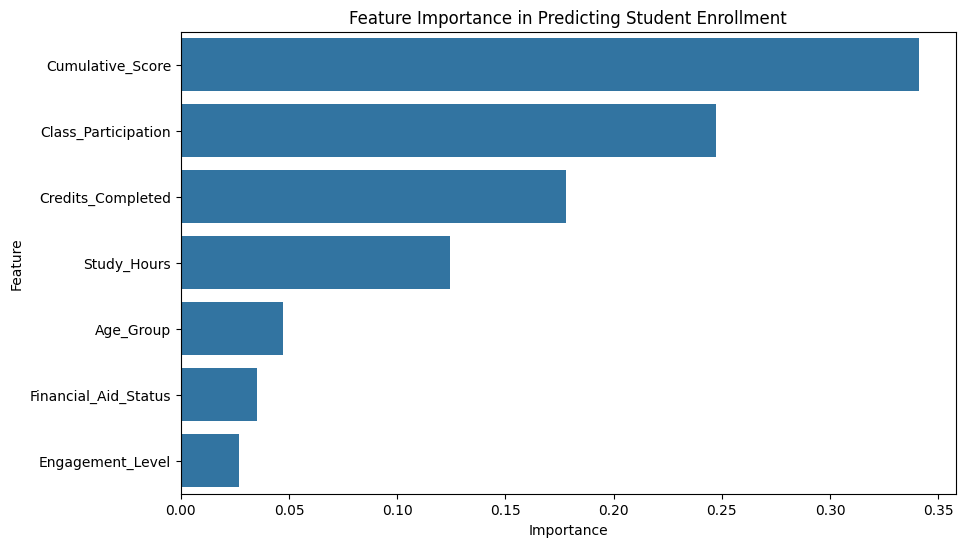

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("/content/Students.csv")


print("Data Preview:")
print(data.head())


data['Financial_Aid_Status'] = data['Financial_Aid_Status'].map({'Yes': 1, 'No': 0})
data['Engagement_Level'] = data['Engagement_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
data['Age_Group'] = data['Age_Group'].map({'18-22': 0, '23-27': 1, '28-32': 2})


X = data.drop(['Student_Code'], axis=1)
y = np.random.choice([0, 1], size=(len(data),))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


feature_importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance in Predicting Student Enrollment")
plt.show()
